# Budget

In [52]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

conn = sqlite3.connect('data/im.db')
cur = conn.cursor()

tn_budgets = pd.read_csv('data/tn.movie_budgets.csv', index_col=0)
tn_budgets.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


In [ ]:
#tn_budgets["domestic_gross"]=tn_budgets["domestic_gross"].apply(lambda x: x.replace("$",""))

In [ ]:
#tn_budgets["domestic_gross"]=tn_budgets["domestic_gross"].apply(lambda x: x.replace(",","").replace("$",""))

In [ ]:
tn_budgets.columns

In [53]:
columns =  ['production_budget', 'domestic_gross','worldwide_gross']

In [54]:
def cleaning(columns):
    for x in columns:
        tn_budgets[x]=tn_budgets[x].apply(lambda x: x.replace(",","").replace("$",""))
        tn_budgets[x]=pd.to_numeric(tn_budgets[x])

In [55]:
cleaning(columns)

In [ ]:
tn_budgets['worldwide_gross'].head(10)

In [ ]:
"""
def to_int():
    for x in ['production_budget', 'domestic_gross','worldwide_gross']:
        tn_budgets[x]=pd.to_numeric(tn_budgets[x])
    return 
"""

In [ ]:
tn_budgets["domestic_gross"]

In [ ]:
tn_budgets.sort_values(by="domestic_gross", ascending=False).head(10)

In [56]:
tn_budgets["total_gross"]=tn_budgets["domestic_gross"]+tn_budgets["worldwide_gross"]

In [57]:
tn_budgets["earnings"]=tn_budgets["total_gross"]-tn_budgets["production_budget"]
tn_budgets.sort_values(by="earnings", ascending=False).head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,earnings
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445,2683973445
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2867572339,2667572339
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2301125489,2086125489
27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2141215444,1916215444
42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2048317790,1848317790
67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1871729814,1681729814
44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,1851102455,1651102455


In [118]:
topten_0 = tn_budgets.sort_values(by="earnings", ascending=False).head(10)
topten = topten_0.loc[:,["movie","production_budget", "earnings"]]
topten = topten.set_index("movie")

In [120]:
#name_movies = list(topten["movie"].values)
#name_movies

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Avatar'),
  Text(1, 0, 'Star Wars Ep. VII: The Force Awakens'),
  Text(2, 0, 'Titanic'),
  Text(3, 0, 'Avengers: Infinity War'),
  Text(4, 0, 'Jurassic World'),
  Text(5, 0, 'The Avengers'),
  Text(6, 0, 'Black Panther'),
  Text(7, 0, 'Furious 7'),
  Text(8, 0, 'Incredibles 2'),
  Text(9, 0, 'Star Wars Ep. VIII: The Last Jedi')])

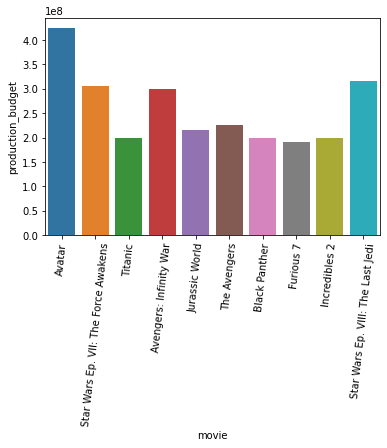

In [81]:
seaborn.barplot(x ="movie", y ="production_budget", data = topten)
plt.xticks(rotation=84)

In [117]:
topten

,production_budget,earnings
movie,,
Avatar,425000000,3111852904
Star Wars Ep. VII: The Force Awakens,306000000,2683973445
Titanic,200000000,2667572339
Avengers: Infinity War,300000000,2426949682
Jurassic World,215000000,2086125489
The Avengers,225000000,1916215444
Black Panther,200000000,1848317790
Furious 7,190000000,1681729814
Incredibles 2,200000000,1651102455


Text(0.5, 1.0, 'Budget for each movie')

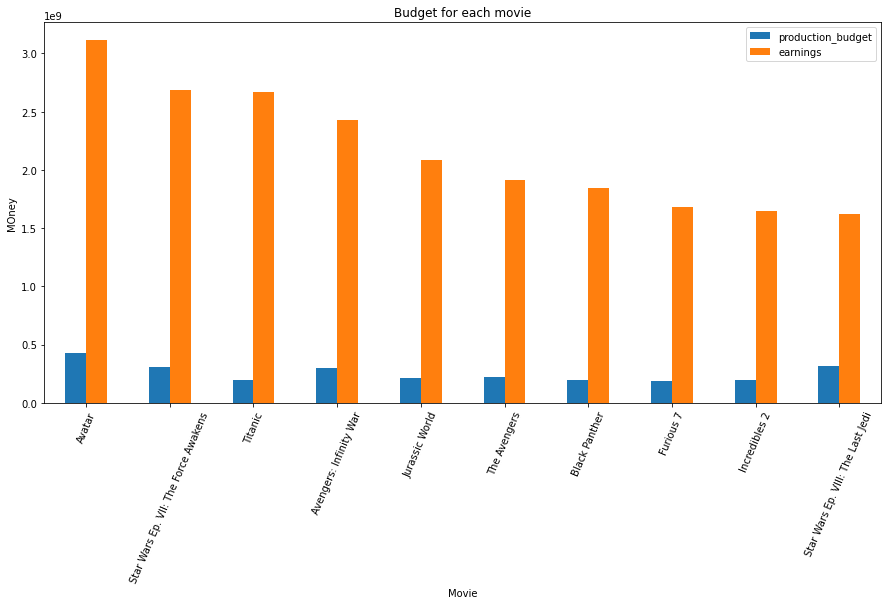

In [121]:
topten.plot.bar(figsize=(15,7))
plt.xticks(rotation=67)
plt.xlabel('Movie')
plt.ylabel('MOney')
plt.title('Budget for each movie')


# Gross


In [ ]:
bom_gross = pd.read_csv('data/bom.movie_gross.csv')
bom_gross.head(10)

In [ ]:
bom_gross["foreign_gross"].dropna(inplace=True)

In [ ]:
bom_gross["foreign_gross"].isna().sum()

In [ ]:
bom_gross["foreign_gross"]

In [ ]:
bom_gross.info()


In [ ]:
rt_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t', index_col=0)
rt_info.head(10)